# Project: Wrangling and Analyze Data

In [1]:
# Imported packages

import pandas as pd
import numpy as np

import requests
import tweepy
import json

import logging
import pprint
import os
import re

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timezone
from dotenv import load_dotenv


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
### 1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_tweets_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
df_tweets_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
def image_pred_download():
    # folder = "img_pred_folder"
    # if not os.path.exists(folder):
    #     os.makedirs(folder)

    image_pred_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    image_pred_response = requests.get(image_pred_url)

    with open("image-predictions.tsv", "wb") as file:
        file.write(image_pred_response.content)

    return pd.read_csv("image-predictions.tsv", sep='\t')

df_image_pred = image_pred_download()

In [4]:
df_image_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Importing authentication keys

load_dotenv()
my_key = os.getenv('API_KEY')
my_secret = os.getenv('API_KEY_SECRET')
access_token = os.getenv('ACCESS_TOKEN')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')
my_token = os.getenv('MY_TOKEN')


In [6]:
# Setting up basic configuration for logging so as to log status and errors during API calls/requests 

logging.basicConfig(level=logging.DEBUG, filename="log.log", filemode="w", format="%(asctime)s - %(levelname)s - %(message)s")

In [7]:
# OAuth 1.0a Authorization

auth = tweepy.OAuth1UserHandler(my_key, my_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# OAuth 2.0 Authentication

client = tweepy.Client(bearer_token=my_token, 
                        consumer_key=my_key, 
                        consumer_secret=my_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret,
                        return_type=dict)


In [9]:
# Making a list of all the tweet ids from the given dataset

id_list = list(df_tweets_enhanced.tweet_id)


In [10]:
# Defining a function to get details tweets by id using OAuth 2.0.

def get_tweets_detailed(id_list):

        """
        I am getting these tweet fields because I plan using them
        for analysis in the future though for this current analysis,
        I will only be using the public metrics.
        """
        tweet_fields = [
            'id',
            'text',
            'created_at',
            'public_metrics',
            'source',
            'entities',
            'reply_settings',
        ]
        return client.get_tweets(id_list, tweet_fields=tweet_fields)
 
        


In [11]:
# Function to save tweets in a text file
def save_tweets_detailed():
    with open("tweet_detailed_json.txt", "w") as file:
        file.write(json.dumps(tweets_detailed))

# Frunction to read the tweets from the text file
def read_tweets_detailed():
    with open("tweet_detailed_json.txt") as file:
        json_obj = json.load(file)
    return json_obj


In [12]:
"""
Creating a function to get tweets in batches because of Twtter's rate limit.
Using the get_tweets method, up to 100 tweets can be gotten with a single HTTP
request. That means all 2400+ tweet data can be gotten at once (with no wait time) 
since we are making only 25 HTTP requests in total (instead of 2400+ requests)

Also, in order to prevent making unnecesary HTTP requests and prevent overwriting
vital data, I have made it so the function only executes if the .txt file does not exist
in the current directory.
"""

def get_tweet_in_batches(list_of_ids, batch_size=100):
    if not os.path.exists('tweet_detailed_json.txt'):
        index = 0
        id_queue = []
        tweets_detailed = []
        while len(id_queue) == batch_size or not id_queue:
            id_queue = list_of_ids[index:(index+batch_size)]
            """
            The get_tweets that was defined above will return a dict object because that 
            is the return type that was set in the client call. It returns a dictionary 
            with a single key "data" and a list of JSON objects as the value. Each object 
            in the list corresponds to a single tweet.
            """
            logging.debug(f"Getting tweets {index} to {index+batch_size}")
            tweets_detailed.extend(iter(get_tweets_detailed(id_queue)['data']))
            index += batch_size
        return tweets_detailed
    else:
        logging.warning("""
                    A tweet_detailed_json.txt file already exists in current directory. 
                    If you want to make new HTTP requests with this function, delete 
                    the 'tweet_detailed_json.txt' file from current directory
                    """)
        return read_tweets_detailed()


# Calling the function to get data for all tweets in the tweet list
tweets_detailed = get_tweet_in_batches(list_of_ids=id_list)

In [13]:
# Confirming the tweets' data was queried properly
pprint.pprint(tweets_detailed[0])


{'created_at': '2017-08-01T16:23:56.000Z',
 'entities': {'annotations': [{'end': 14,
                               'normalized_text': 'Phineas',
                               'probability': 0.6637,
                               'start': 8,
                               'type': 'Person'}],
              'urls': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
                        'end': 109,
                        'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
                        'media_key': '3_892420639486877696',
                        'start': 86,
                        'url': 'https://t.co/MgUWQ76dJU'}]},
 'id': '892420643555336193',
 'public_metrics': {'like_count': 33797,
                    'quote_count': 219,
                    'reply_count': 139,
                    'retweet_count': 6999},
 'reply_settings': 'everyone',
 'source': 'Twitter for iPhone',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole

In [14]:
# Confirming the number of tweets queried
len(tweets_detailed)

2327

In [15]:
# Saving the detailed tweet data to a text file
save_tweets_detailed()

In [16]:
# Reading the detailed tweet data from the text file
tweets_detailed = read_tweets_detailed()

In [17]:
# Functions to extract only the public metrics from the detailed tweet data and store in a text file

def get_tweets_data():
    tweet_data = []
    for data in tweets_detailed:
        data["public_metrics"]["tweet_id"] = data['id']
        data["public_metrics"]["created_at"] = data['created_at']
        tweet_data.append(data["public_metrics"])
    return tweet_data

def save_tweets_data():
    with open("tweet_json.txt", "w") as file:
        file.write(json.dumps(get_tweets_data()))

save_tweets_data()


In [18]:
# Reading the tweets' data to a pandas dataframe

df_public_metrics = pd.read_json("tweet_json.txt")
df_public_metrics

,retweet_count,reply_count,like_count,quote_count,tweet_id,created_at
0,6999,139,33797,219,892420643555336192,2017-08-01 16:23:56+00:00
1,5298,170,29314,274,892177421306343424,2017-08-01 00:17:27+00:00
2,3477,109,22044,145,891815181378084864,2017-07-31 00:18:03+00:00
3,7220,142,36917,286,891689557279858688,2017-07-30 15:58:51+00:00
4,7753,193,35297,296,891327558926688256,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2322,37,9,89,0,666049248165822464,2015-11-16 00:24:50+00:00
2323,115,1,247,2,666044226329800704,2015-11-16 00:04:52+00:00
2324,36,1,100,0,666033412701032448,2015-11-15 23:21:54+00:00
2325,39,0,112,0,666029285002620928,2015-11-15 23:05:30+00:00


In [19]:
# Saving the new twitter data to a csv
df_public_metrics.to_csv('tweets_public_metrics.csv', index=False)
logging.debug("Successfully saved df_public_metrics to tweets_public_metrics.csv in current directory")
# if os.path.exists('tweets_public_metrics.csv'):
# else:
#     logging.warning("CSV file was not created")

In [20]:
# Function to get information for a list of tweet ids using OAuth 1.0a

def get_tweets_single(id_list):
    """
    This function makes a HTTP request for each tweet one by one
    """
    for tweet_id in id_list:
        try:
            logging.debug('get_tweets_single: fetching tweet for ID %s', tweet_id)
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print(f"{tweet_id}, {tweet.text.encode('UTF-8')}")
            print(f"{tweet_id}, {tweet.favorite_count}")
            print(f"{tweet_id}, {tweet.retweet_count}")
            return tweet
        except tweepy.TweepyException as te:
            logging.warn('get_tweets_single: failed to get tweet ID %s: %s', tweet_id, te.message)



## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [21]:
# df_tweets_enhanced["in_reply_to_status_id"].isnull().sum()
# df_public_metrics["like_count"].value_counts()
# df_public_metrics.query("like_count == 0")
# df_tweets_enhanced[df_tweets_enhanced["in_reply_to_status_id"].notna()]

df_tweets_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues
1. Large number of missing values in the following columns: 
	in_reply_to_status_id, 
	in_reply_to_user_id, 
	retweeted_status_id, 
	retweeted_status_user_id, 
	retweeted_status_timestamp

2. 181 of the tweets are retweets (since they have a retweet status id)
   
3. id columns (column names ending with 'id') are in numeric datatype instead of string datatype

4. Timestamp columns are string instead of datetime datatype

5. None values interpreted as string in dog stage columns

6. The dog ratings were not properly extracted for some tweets as they are different from the values in the tweet text

7. Dog prediction names are separated by underscores instead of spaces and they are not capitalized

8. Some of the names in the `names` column are not valid names for dogs.

### Tidiness issues
1. Dog stage variable is in multiple columns instead of one
   
2. The 3 datasets are in 3 seperate tables instead of 1.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data

df_copy_image_pred = df_image_pred.copy()
df_copy_public_metrics = df_public_metrics.copy()
df_copy_tweets_enhanced = df_tweets_enhanced.copy()

### Issue #1:

#### Define

- From the `tweets enhanced` table, remove rows that have `retweeted status id` since they are retweets and are not needed for this analysis.
- Also remove rows that have reply_status_id and reply_status_user_id

#### Code

In [23]:
# Checking the shape before removing rows
df_copy_tweets_enhanced.shape

(2356, 17)

In [24]:
# Removing the rows
df_copy_tweets_enhanced = df_copy_tweets_enhanced[df_tweets_enhanced["retweeted_status_id"].isna(
)]

# Droping the columns 
df_copy_tweets_enhanced.drop(columns=['retweeted_status_id',
                                      'retweeted_status_user_id',
                                      'retweeted_status_timestamp',
                                      'in_reply_to_status_id',
                                      'in_reply_to_user_id'],
                             inplace=True)


#### Test

In [25]:
# Checking the shape after removing the rows
df_copy_tweets_enhanced.shape

(2175, 12)

### Issue #2:

#### Define

Change `id` columns to string datatype in the 3 tables, since they will not be used for any arithmetic operation

#### Code

In [26]:
# df_copy_image_pred.dtypes
# df_copy_public_metrics.dtypes
df_copy_tweets_enhanced.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [27]:
df_copy_image_pred = df_copy_image_pred.astype({'tweet_id':'str'})
df_copy_public_metrics = df_copy_public_metrics.astype({'tweet_id':'str'})
df_copy_tweets_enhanced = df_copy_tweets_enhanced.astype({'tweet_id':'str'})

#### Test

In [28]:
df_copy_image_pred.dtypes
# df_copy_public_metrics.dtypes
# df_copy_tweets_enhanced.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #3:

#### Define

Change `timestamp` column to datetime datatype

#### Code

In [29]:
# Confirming the timestamp column is currently a string datatype
df_copy_tweets_enhanced.dtypes

tweet_id              object
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [30]:
# Changing the timestamp column datatype to datetime
df_copy_tweets_enhanced['timestamp'] = pd.to_datetime(df_copy_tweets_enhanced['timestamp'])


#### Test

In [31]:
df_copy_tweets_enhanced.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #4:

#### Define

Replace 'None' string to None datatype in the dog stage columns

#### Code

In [32]:
# Confirming that the last 4 columns are showing 2175 values each
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [33]:
def replace_none_values():
    for column in df_copy_tweets_enhanced.columns:
        df_copy_tweets_enhanced[column].replace('None', None, inplace=True)

replace_none_values()

#### Test

In [34]:
# Confirming that None strings have been properly converted to NaNs
df_copy_tweets_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1495 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #5:

#### Define

After some visual assessment in Excel, I made some obeservations concerning the dog ratings in the tweets. They are documented in the `wrangle_report` document. For now, I will be doing the following:
- Extract the dog rating numerator again from the tweet text, taking decimal numbers (e.g. 13.5/10) and negative ratings (e.g. -5/10) into account.
- Change `rating_numerator` column to float datatype and `rating_denominator` column to integer datatype
- Remove rows where rating_demoninator is not equal to 10 because there was no dog rating in the tweets so those numbers not valid

#### Code

In [35]:
df_copy_tweets_enhanced.shape

(2175, 12)

In [36]:
"""
The function below is created to extract ratings, both decimal
and non decimal. It only extracts ratings with denominator of 10
and it also extracts negative ratings. Some of the tweets in the
dataset have more than one dog rating so I just took the last
rating.
"""
def get_rating(text):
    try:
        return re.findall("-?\d+\.\d+\/10|-?\d+\/10", text)[-1]
    except IndexError:
        return np.nan


In [37]:
# Function to split the rating numbers to fill the numerator and denominator columns
def split_rating(rating, index):
    try:
        return rating.split("/")[index]
    except AttributeError:
        return 0

In [38]:
# Extracting the ratings agin with the new regular expression and storing in a new column
df_copy_tweets_enhanced['rating'] = df_copy_tweets_enhanced['text'].apply(lambda x: get_rating(x))

# Confirming changes
df_copy_tweets_enhanced[['text', 'rating_numerator', 'rating_denominator', 'rating']]


,text,rating_numerator,rating_denominator,rating
0,This is Phineas. He's a mystical boy. Only eve...,13,10,13/10
1,This is Tilly. She's just checking pup on you....,13,10,13/10
2,This is Archie. He is a rare Norwegian Pouncin...,12,10,12/10
3,This is Darla. She commenced a snooze mid meal...,13,10,13/10
4,This is Franklin. He would like you to stop ca...,12,10,12/10
...,...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,5,10,5/10
2352,This is a purebred Piers Morgan. Loves to Netf...,6,10,6/10
2353,Here is a very happy pup. Big fan of well-main...,9,10,9/10
2354,This is a western brown Mitsubishi terrier. Up...,7,10,7/10


In [39]:
# Extracting the numerators and denominators again
df_copy_tweets_enhanced['rating_numerator'] = df_copy_tweets_enhanced['rating'].apply(lambda x: split_rating(x, 0))
df_copy_tweets_enhanced['rating_denominator'] = df_copy_tweets_enhanced['rating'].apply(lambda x: split_rating(x, 1))

# Confirming changes
df_copy_tweets_enhanced[['text', 'rating_numerator', 'rating_denominator', 'rating']]

,text,rating_numerator,rating_denominator,rating
0,This is Phineas. He's a mystical boy. Only eve...,13,10,13/10
1,This is Tilly. She's just checking pup on you....,13,10,13/10
2,This is Archie. He is a rare Norwegian Pouncin...,12,10,12/10
3,This is Darla. She commenced a snooze mid meal...,13,10,13/10
4,This is Franklin. He would like you to stop ca...,12,10,12/10
...,...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,5,10,5/10
2352,This is a purebred Piers Morgan. Loves to Netf...,6,10,6/10
2353,Here is a very happy pup. Big fan of well-main...,9,10,9/10
2354,This is a western brown Mitsubishi terrier. Up...,7,10,7/10


In [40]:
# Confirming current datatype for rating_numerator and rating_denominator columns
df_copy_tweets_enhanced.dtypes


tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                   object
rating_denominator                 object
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
rating                             object
dtype: object

In [41]:
# Changing the datatype to float and int respectively
df_copy_tweets_enhanced = df_copy_tweets_enhanced.astype({'rating_numerator': 'float64'})
df_copy_tweets_enhanced = df_copy_tweets_enhanced.astype({'rating_denominator': 'int64'})

# Confirming changes
df_copy_tweets_enhanced.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
rating                             object
dtype: object

In [42]:
# df_copy_tweets_enhanced.query("rating_numerator < 10 or rating_numerator > 18")

In [43]:
# Checking for rows with denominator not equal to 10, i.e tweets that have no rating
df_copy_tweets_enhanced[df_copy_tweets_enhanced['rating_denominator'] != 10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 342 to 1843
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            16 non-null     object             
 1   timestamp           16 non-null     datetime64[ns, UTC]
 2   source              16 non-null     object             
 3   text                16 non-null     object             
 4   expanded_urls       13 non-null     object             
 5   rating_numerator    16 non-null     float64            
 6   rating_denominator  16 non-null     int64              
 7   name                3 non-null      object             
 8   doggo               0 non-null      object             
 9   floofer             0 non-null      object             
 10  pupper              0 non-null      object             
 11  puppo               0 non-null      object             
 12  rating              0 non-null    

In [44]:
# Confirming the number of rows before dropping the rows
df_copy_tweets_enhanced.shape

(2175, 13)

In [45]:
# Removing tweets that have no rating by replacing the dataframe with filtered dataframe
df_copy_tweets_enhanced = df_copy_tweets_enhanced[df_copy_tweets_enhanced['rating_denominator'] == 10]

#### Test

In [46]:
# Confirming that the number of rows has reduced
df_copy_tweets_enhanced.shape

(2159, 13)

### Issue #6:

#### Define

Remove the underscores in the dog breed names and capitalize them

#### Code

In [47]:
df_copy_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [48]:
def reformat_dog_breed_names():
    columns = ['p1', 'p2', 'p3'] # List of columns to be worked on
    for column in columns:
        df_copy_image_pred[column] = df_copy_image_pred[column].apply(lambda x: " ".join(x.split('_')).title())
        df_copy_image_pred[column] = df_copy_image_pred[column].apply(lambda x: " ".join(x.split('_')).title())

reformat_dog_breed_names()

#### Test

In [49]:
df_copy_image_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7:

#### Define

Replace invalid dog names with None by removing all names that are lower case.

#### Code

In [50]:
# Invalid dog names are in lower case
df_copy_tweets_enhanced[['text', 'name']].tail()

,text,name
2351,Here we have a 1949 1st generation vulpix. Enj...,None
2352,This is a purebred Piers Morgan. Loves to Netf...,a
2353,Here is a very happy pup. Big fan of well-main...,a
2354,This is a western brown Mitsubishi terrier. Up...,a
2355,Here we have a Japanese Irish Setter. Lost eye...,None


In [51]:
# Function to remove names that are lower case
def remove_invalid_names(value):
    try:
        return None if value.islower() else value
    except AttributeError:
        return value


In [52]:
# Replacing invalid dog names with None
df_copy_tweets_enhanced['name'] = df_copy_tweets_enhanced['name'].apply(lambda x: remove_invalid_names(x))


#### Test

In [53]:
df_copy_tweets_enhanced[['text', 'name']].tail()

,text,name
2351,Here we have a 1949 1st generation vulpix. Enj...,None
2352,This is a purebred Piers Morgan. Loves to Netf...,None
2353,Here is a very happy pup. Big fan of well-main...,None
2354,This is a western brown Mitsubishi terrier. Up...,None
2355,Here we have a Japanese Irish Setter. Lost eye...,None


### Issue #8:

#### Define

Merge the dog stage columns to one column.

#### Code

In [54]:
df_copy_tweets_enhanced[['name', 'doggo', 'floofer', 'pupper', 'puppo']].head(16)


,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
5,None,None,None,None,None
6,Jax,None,None,None,None
7,None,None,None,None,None
8,Zoey,None,None,None,None
9,Cassie,doggo,None,None,None


In [55]:
# Changing all values in dog_stage column to NaN values
df_copy_tweets_enhanced['dog_stage'] = np.nan

# Indiviually applying the dog stage based on which dog stage column is populated
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['doggo'] == 'doggo', df_copy_tweets_enhanced['doggo'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['floofer'] == 'floofer', df_copy_tweets_enhanced['floofer'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['pupper'] == 'pupper', df_copy_tweets_enhanced['pupper'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(df_copy_tweets_enhanced['puppo'] == 'puppo', df_copy_tweets_enhanced['puppo'], df_copy_tweets_enhanced['dog_stage'])


In [56]:
# Dropping unnecessary columns
df_copy_tweets_enhanced.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

#### Test

In [57]:
# Checking 'doggo' dog stage
df_copy_tweets_enhanced[df_copy_tweets_enhanced['dog_stage']=='doggo'].head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,14/10,doggo
43,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,12/10,doggo
99,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,None,12/10,doggo
108,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,12/10,doggo
110,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,None,14/10,doggo


In [58]:
# Checking 'puppo' dog stage
df_copy_tweets_enhanced[df_copy_tweets_enhanced['dog_stage']=='puppo'].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10,None,13/10,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10,Stuart,13/10,puppo
71,878776093423087618,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10,Snoopy,13/10,puppo
94,874012996292530176,2017-06-11 21:18:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13.0,10,Sebastian,13/10,puppo
129,867421006826221569,2017-05-24 16:44:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12.0,10,Shikha,12/10,puppo


### Issue #10:

#### Define

Join the 3 tables to one master table

#### Code

In [59]:
def merge_tables():
    table = pd.merge(df_copy_image_pred, df_copy_tweets_enhanced, how='inner', on='tweet_id')
    return pd.merge(table, df_copy_public_metrics, how='inner', on='tweet_id')

df_master = merge_tables()

#### Test

In [60]:
df_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1286
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1287 non-null   object             
 1   jpg_url             1287 non-null   object             
 2   img_num             1287 non-null   int64              
 3   p1                  1287 non-null   object             
 4   p1_conf             1287 non-null   float64            
 5   p1_dog              1287 non-null   bool               
 6   p2                  1287 non-null   object             
 7   p2_conf             1287 non-null   float64            
 8   p2_dog              1287 non-null   bool               
 9   p3                  1287 non-null   object             
 10  p3_conf             1287 non-null   float64            
 11  p3_dog              1287 non-null   bool               
 12  timestamp           1287 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
df_master.to_csv('twitter_archive_master.csv', index=False)
df_copy_image_pred.to_csv('cleaned_image_pred.csv', index=False)
df_copy_public_metrics.to_csv('cleaned_public_metrics.csv', index=False)
df_copy_tweets_enhanced.to_csv('cleaned_tweets_enhanced.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### I have 3 questions I would like to analyze with this data.
1. Based on the algorithms first prediction for each image, what percent were correct (actual dog breeds) and what percentage were wrong?

In [62]:
df_master.head()
algo_pred = df_master.groupby(['p1_dog'])['p1_dog'].count()
algo_pred

p1_dog
False    339
True     948
Name: p1_dog, dtype: int64

2. So far, what is the fastest retweeted tweet from the time it was posted?
   * In order to analize this, we have to find the ratio between the number of retweets and the age (in days) of the tweet.
   * To get the age of the tweet, I will add a calculated column for age
   * To get the retweet ratio, I will add a calculted column as well

In [63]:

def add_days_column():
    today = datetime.now(timezone.utc)
    df_master['days'] = df_master['created_at'].apply(lambda x: (today - x) / np.timedelta64(1, 'D')).astype('int')

def add_ratio_column():
    df_master['retweet_ratio'] = df_master['retweet_count'] / df_master['days']

add_days_column()
add_ratio_column()

top_tweets = df_master.sort_values(by='retweet_ratio', ascending=False).head(10)
top_tweets[['tweet_id', 'text', 'name', 'retweet_count', 'like_count', 'created_at', 'days', 'retweet_ratio']]
top_tweets

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,name,rating,dog_stage,retweet_count,reply_count,like_count,quote_count,created_at,days,retweet_ratio
1056,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,...,Stephan,13/10,NaN,51627,908,111599,2975,2016-12-09 06:17:20+00:00,2045,25.245477
1097,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard Poodle,0.351308,True,Toy Poodle,0.271929,True,Tibetan Terrier,...,Bo,14/10,doggo,34528,237,82668,1030,2017-01-11 02:15:36+00:00,2012,17.161034
1201,859196978902773760,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False,Malamute,0.216163,True,Persian Cat,...,None,12/10,NaN,26270,520,80551,1307,2017-05-02 00:04:57+00:00,1901,13.819043
903,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,Gondola,0.318851,False,Sea Lion,0.306525,False,Pool Table,...,None,10/10,NaN,26738,562,46282,2895,2016-08-05 21:19:27+00:00,2170,12.321659
1225,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden Retriever,0.841001,True,Great Pyrenees,0.099278,True,Labrador Retriever,...,Zoey,13/10,NaN,22731,750,73921,1018,2017-06-01 20:18:38+00:00,1870,12.155615
394,678399652199309312,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,Swing,0.929196,False,Bedlington Terrier,0.015047,True,Great Pyrenees,...,None,12/10,NaN,28565,547,73483,1321,2015-12-20 02:20:55+00:00,2400,11.902083
360,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,Bubble,0.997556,False,Leafhopper,0.000159,False,Whippet,...,Kenneth,10/10,NaN,27764,359,70926,517,2015-12-14 01:58:31+00:00,2406,11.539485
1023,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,Golden Retriever,0.193082,True,Chesapeake Bay Retriever,0.157927,True,Soft-Coated Wheaten Terrier,...,None,13/10,doggo,21962,349,46788,1152,2016-11-07 03:14:10+00:00,2077,10.573905
1208,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,Chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,...,None,13/10,NaN,19995,200,66281,641,2017-05-10 00:08:34+00:00,1893,10.562599
1282,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,...,None,13/10,NaN,15746,159,56831,377,2017-07-28 00:22:40+00:00,1814,8.680265


3. What is the relationship between retweets and likes? 
   * I will be creating a seperate dataframe for this

In [64]:
retweets_v_likes = df_master[['tweet_id', 'retweet_count', 'like_count']]
retweets_v_likes

,tweet_id,retweet_count,like_count
0,666029285002620928,39,112
1,666044226329800704,115,247
2,666051853826850816,702,1027
3,666057090499244032,112,248
4,666058600524156928,47,99
...,...,...,...
1282,890729181411237888,15746,56831
1283,891087950875897856,2599,17802
1284,891327558926688256,7753,35297
1285,891689557279858688,7220,36917


### Insights:
1. From the #1 image predictions we have in our master dataset, we can see that 74% of the time, the predictions were actual dogs.

2. We can see here that the most viral tweet (measured by retweet count) is for a dog named Stephan given a rating of 13/10. The tweet was posted in December 2016 and has since gained over 111k likes and over 51k retweets.

3. From the scatterplot below (in the next section), we can see that there is a positive correlation between a tweets like count and retweet count.

### Visualization

In [65]:
# chart text and figure size
sns.set(rc={"figure.figsize": (15, 8)}, font_scale=2)


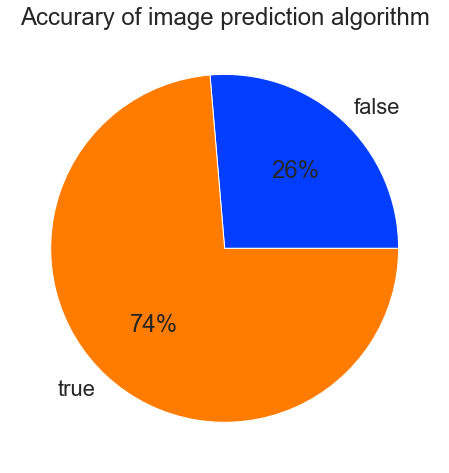

In [66]:
def plot_pie_chart():
    colors = sns.color_palette('bright')
    plt.title('Accurary of image prediction algorithm')
    labels = ['false', 'true']
    plt.pie(algo_pred, labels=labels,
            colors=colors, autopct='%.0f%%');

plot_pie_chart()

In [67]:
# def plot_vertical_bar():
#     sns.barplot('retweet_ratio', 'name', data=top_tweets)
#     sns.set_style("whitegrid")

#     plt.title('Most viral tweets')
#     plt.xlabel('Growth rate')
#     plt.ylabel('Tweet')

# plot_vertical_bar()

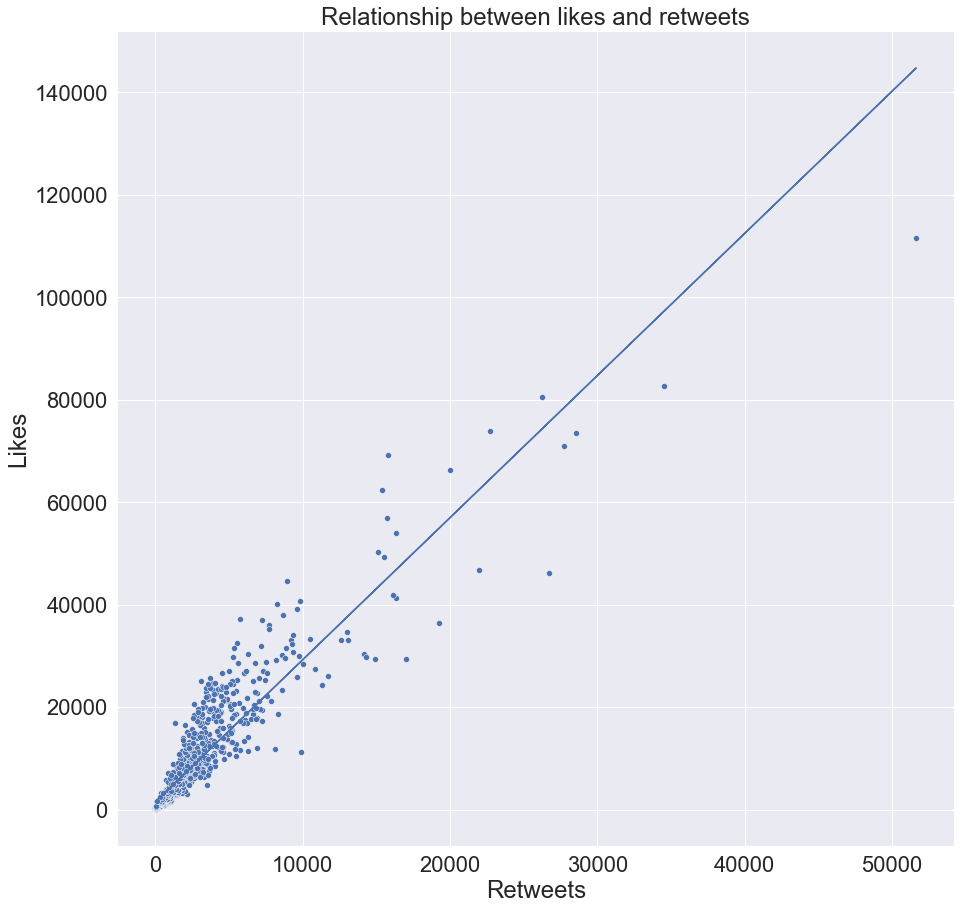

In [69]:
def plot_scatterplot():
    x_plot = np.array(retweets_v_likes['retweet_count'])
    y_plot = np.array(retweets_v_likes['like_count'])

    sns.scatterplot(x=x_plot, y=y_plot)

    sns.set(rc={"figure.figsize": (15, 15)}, font_scale=2)

    w = np.polyfit(x_plot, y_plot, 1)
    x = np.poly1d(w)

    # adding trendline to plot
    plt.plot(x_plot, x(x_plot))

    plt.title('Relationship between likes and retweets')
    plt.xlabel('Retweets')
    plt.ylabel('Likes')

plot_scatterplot()

# References
### Some of the very helpful URLs for me are listed below
- https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe#:~:text=You%20can%20use%20DataFrame.,not%20the%20string%20'None'%20.
- https://www.geeksforgeeks.org/python-program-split-join-string/#:~:text=the%20split()%20method%20in,joined%20by%20the%20str%20separator.
- https://towardsdatascience.com/fix-valueerror-truth-value-of-a-series-is-ambiguous-pandas-a683f0fd1b2f
- https://www.learndatasci.com/solutions/python-valueerror-truth-value-series-ambiguous-use-empty-bool-item-any-or-all/
- https://medium.com/analytics-vidhya/dealing-with-missing-values-nan-and-none-in-python-6fc9b8fb4f31#:~:text=As%20summary%2C%20NaN%20and%20None,To%20detect%20missing%20values%2C%20df.
- https://www.geeksforgeeks.org/get-utc-timestamp-in-python/